In [1]:
TChain * cRcp, * cSpectra;

TCanvas * can = new TCanvas( "can", "can" );

TH1D * rcp_N_ppT, *spectra_N_ppT;

TH1D * h_ratio;

In [2]:
cRcp = new TChain( "rcpPicoDst" );
cSpectra = new TChain( "SpectraPicoDst" );

In [3]:
cRcp->Add( "RcpPicoDst/*.root" );
cSpectra->Add( "SpectraPicoDst/*.root" );

In [4]:
cRcp->Draw( "ppT>>rcp_ppT(50, -5, 5)", " bin9==8 && dca < 1.0 && nHitsFit-1.0 > 16 && nHitsDedx > 11 && ((nHitsFit-1.0) / (nHitsPossible-1.0)) > 0.52 && pEta < 0.25 && matchFlag>=1 && fabs(yLocal) < 1.6 && fabs(zLocal) < 2.8 && beta > -80" );
cSpectra->Draw( "ppT>>spectra_ppT(50, -5, 5)", "bin9==8 && dca < 1.0 && nHitsFit > 16 && nHitsDedx > 11 && (nHitsFit / nHitsPossible) > 0.52 && pEta < 0.25 && matchFlag>=1 && fabs(yLocal) < 1.6 && fabs(zLocal) < 2.8 && beta > -80" );

In [5]:
cRcp->Draw( "bin9>>rcp_bin9" );
cSpectra->Draw( "bin9>>spectra_bin9" );

In [6]:
rcp_N_ppT = (TH1D*)rcp_ppT->Clone( "rcp_N_ppT" );
spectra_N_ppT = (TH1D*)spectra_ppT->Clone( "spectra_N_ppT" );

In [7]:
rcp_N_ppT->Scale( 1.0 / rcp_bin9->GetBinContent( 9 ) );
spectra_N_ppT->Scale( 1.0 / spectra_bin9->GetBinContent( 9 ) );

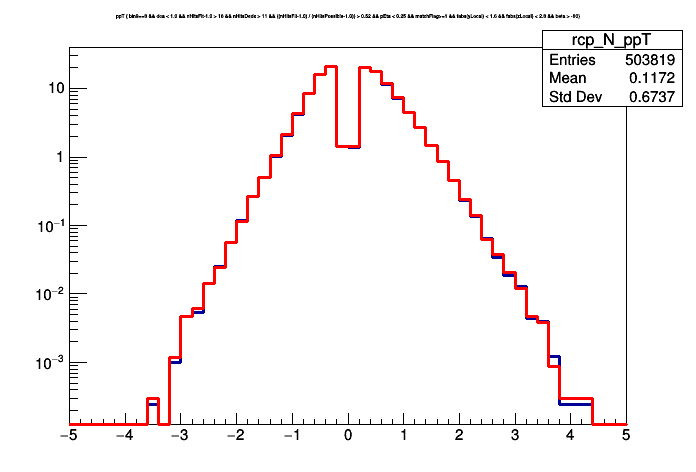

In [8]:
rcp_N_ppT->Draw();
spectra_N_ppT->Draw("same");
spectra_N_ppT->SetLineColor( kRed );
can->SetLogy(1);
can->Draw()


****************************************
Minimizer is Linear
Chi2                      =   0.00164882
NDf                       =           19
p0                        =     0.990098   +/-   0.222497    


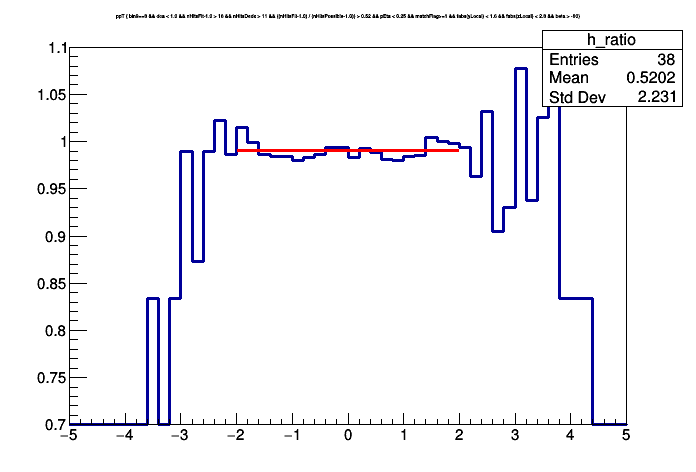

In [9]:
h_ratio = (TH1D*) rcp_N_ppT->Clone( "h_ratio" );
h_ratio->Divide( spectra_N_ppT );
h_ratio->Draw();
h_ratio->GetYaxis()->SetRangeUser( 0.7, 1.1 );
h_ratio->Fit( "pol0", "R", "", -2, 2 );
can->SetLogy(0);
can->Draw();

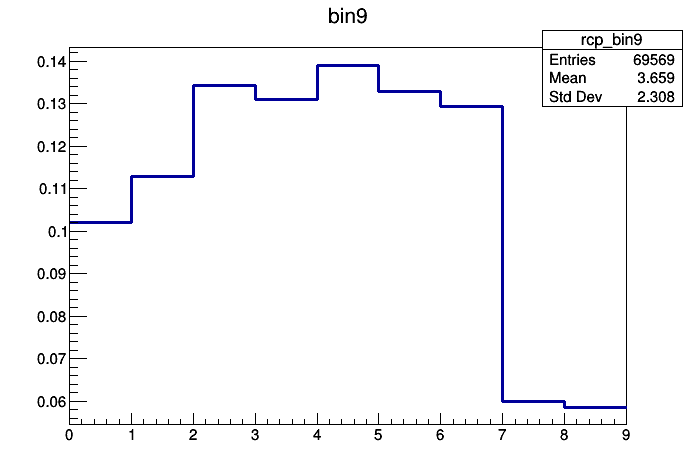

In [10]:
rcp_bin9->Scale( 1.0 / rcp_bin9->Integral() );
rcp_bin9->Draw();
can->Draw();

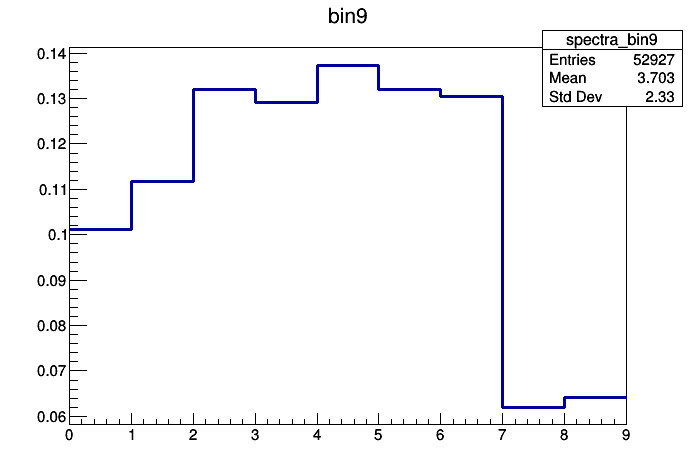

In [11]:
spectra_bin9->Scale( 1.0 / spectra_bin9->Integral() );
spectra_bin9->Draw();
can->Draw();

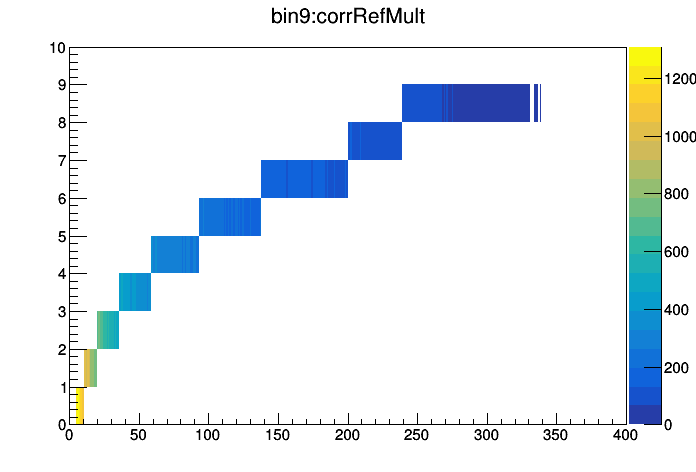

In [12]:
gStyle->SetOptStat(0);
cRcp->Draw( "bin9:corrRefMult>>(400, 0, 400, 10, 0, 10)", "", "colz" );
can->Draw();

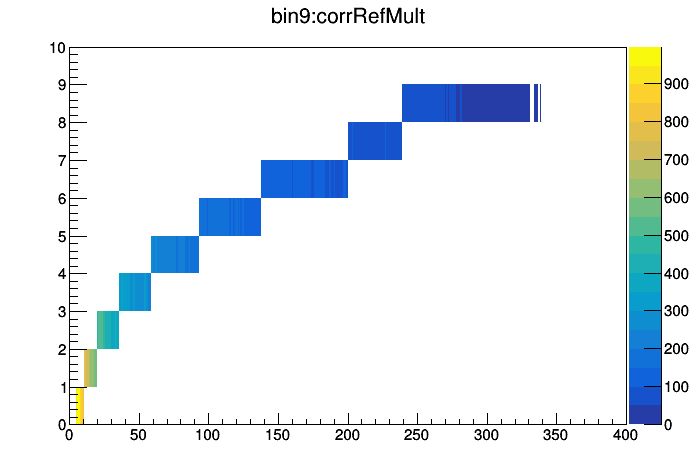

In [13]:

cSpectra->Draw( "bin9:corrRefMult>>(400, 0, 400, 10, 0, 10)", "", "colz" );
can->Draw();

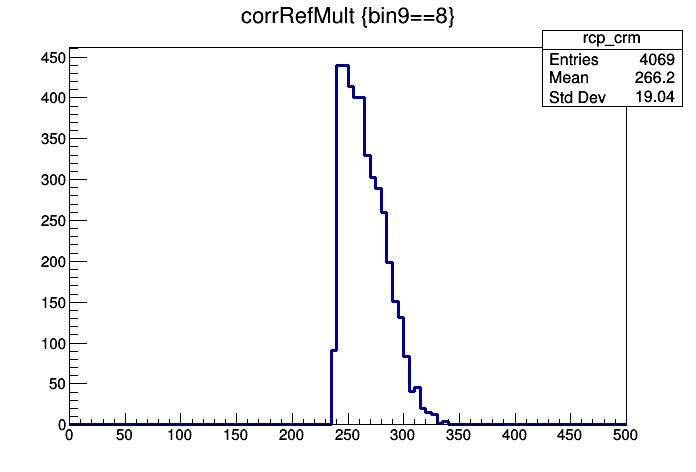

In [14]:
gStyle->SetOptStat(1111);
cRcp->Draw( "corrRefMult>>rcp_crm(100, 0, 500)", "bin9==8" );
can->Draw();

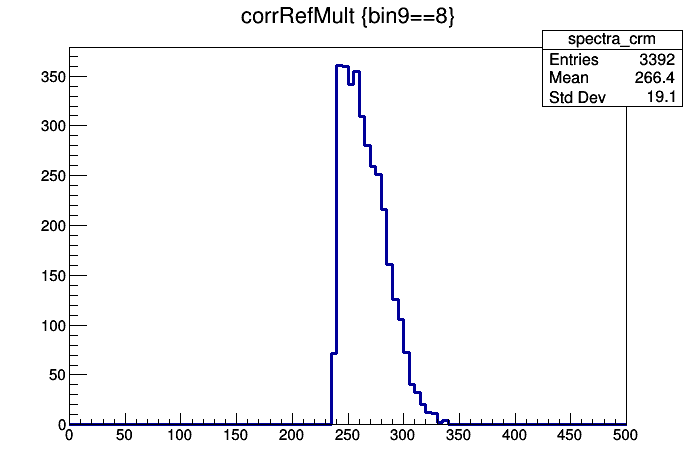

In [15]:
cSpectra->Draw( "corrRefMult>>spectra_crm(100, 0, 500)", "bin9==8" );
can->Draw();

In [16]:
spectra_crm->Scale( 1.0 / spectra_crm->Integral() );
rcp_crm->Scale( 1.0 / rcp_crm->Integral() );

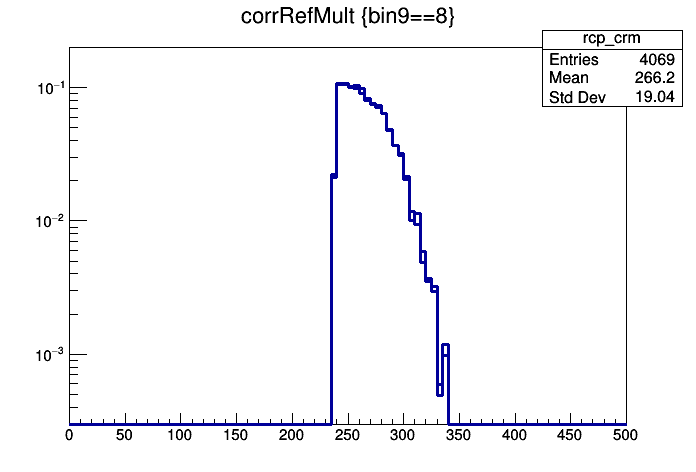

In [17]:
spectra_crm->Draw();
rcp_crm->Draw("same");
can->Draw();
can->SetLogy(1);

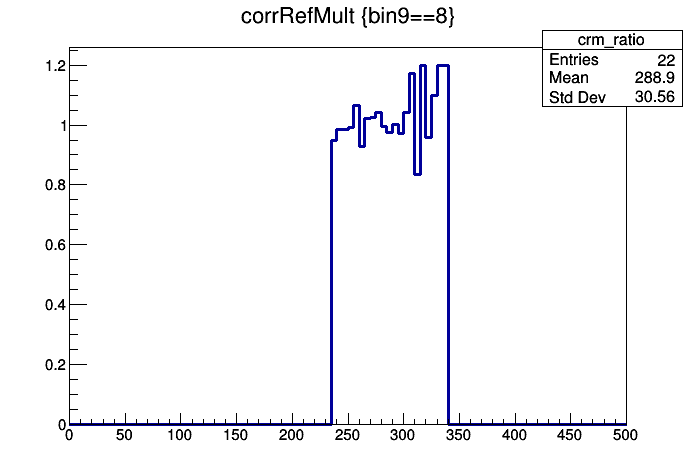

In [18]:
TH1D * crm_ratio = (TH1D*)spectra_crm->Clone("crm_ratio");
crm_ratio->Divide( rcp_crm );
crm_ratio->Draw();
can->Draw();
can->SetLogy(0);